# Assignment 5, Question 4: Data Exploration

**Points: 15**

In this notebook, you'll explore the clinical trial dataset using pandas selection and filtering techniques.

You'll use utility functions from `q3_data_utils` where helpful, but also demonstrate direct pandas operations.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities from Q3
from q3_data_utils import load_data, detect_missing, filter_data

# Load the data
df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients with {len(df.columns)} variables")

# Prewritten visualization functions for exploration
def plot_value_counts(series, title, figsize=(10, 6)):
    """
    Create a bar chart of value counts.
    
    Args:
        series: pandas Series with value counts
        title: Chart title
        figsize: Figure size tuple
    """
    plt.figure(figsize=figsize)
    series.plot(kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_crosstab(crosstab_data, title, figsize=(10, 6)):
    """
    Create a heatmap of crosstab data.
    
    Args:
        crosstab_data: pandas DataFrame from pd.crosstab()
        title: Chart title
        figsize: Figure size tuple
    """
    plt.figure(figsize=figsize)
    plt.imshow(crosstab_data.values, cmap='Blues', aspect='auto')
    plt.colorbar()
    plt.title(title)
    plt.xticks(range(len(crosstab_data.columns)), crosstab_data.columns, rotation=45)
    plt.yticks(range(len(crosstab_data.index)), crosstab_data.index)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients with 18 variables


## Part 1: Basic Exploration (3 points)

Display:
1. Dataset shape
2. Column names and types
3. First 10 rows
4. Summary statistics (.describe())

In [2]:
# TODO: Display dataset info
print("Dataset Shape:")
print(df.shape)
print("Column names and types:")
print(df.info())
print("First 10 rows of the dataset:")
print(df.head(n=10))  
print("Statistical summary of numerical columns:")
print(df.describe(include='all'))

Dataset Shape:
(10000, 18)
Column names and types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          10000 non-null  object 
 1   age                 10000 non-null  int64  
 2   sex                 10000 non-null  object 
 3   bmi                 9562 non-null   float64
 4   enrollment_date     10000 non-null  object 
 5   systolic_bp         9586 non-null   float64
 6   diastolic_bp        9586 non-null   float64
 7   cholesterol_total   9446 non-null   float64
 8   cholesterol_hdl     9446 non-null   float64
 9   cholesterol_ldl     9446 non-null   float64
 10  glucose_fasting     9631 non-null   float64
 11  site                10000 non-null  object 
 12  intervention_group  10000 non-null  object 
 13  follow_up_months    10000 non-null  int64  
 14  adverse_events      10000 non-null  int64  
 15  out

## Part 2: Column Selection (3 points)

Demonstrate different selection methods:

1. Select only numeric columns using `.select_dtypes()`
2. Select specific columns by name
3. Select a subset of rows and columns using `.loc[]`

In [3]:
# TODO: Select numeric columns
df.select_dtypes(include='number')


,age,bmi,systolic_bp,diastolic_bp,cholesterol_total,cholesterol_hdl,cholesterol_ldl,glucose_fasting,follow_up_months,adverse_events,adherence_pct
0,80,29.3,123.0,80.0,120.0,55.0,41.0,118.0,20,0,24.0
1,80,NaN,139.0,81.0,206.0,58.0,107.0,79.0,24,0,77.0
2,82,-1.0,123.0,86.0,172.0,56.0,82.0,77.0,2,0,70.0
3,95,25.4,116.0,77.0,200.0,56.0,104.0,115.0,17,0,62.0
4,95,NaN,97.0,71.0,185.0,78.0,75.0,113.0,9,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9995,72,23.2,122.0,73.0,182.0,54.0,92.0,97.0,21,0,20.0
9996,100,28.9,124.0,78.0,157.0,56.0,70.0,102.0,11,0,57.0
9997,78,23.8,110.0,63.0,154.0,69.0,71.0,114.0,2,1,77.0
9998,86,27.0,139.0,98.0,196.0,38.0,119.0,126.0,16,0,63.0


In [4]:
# TODO: Select specific columns
df[['age', 'bmi', 'cholesterol_total']]

,age,bmi,cholesterol_total
0,80,29.3,120.0
1,80,NaN,206.0
2,82,-1.0,172.0
3,95,25.4,200.0
4,95,NaN,185.0
...,...,...,...
9995,72,23.2,182.0
9996,100,28.9,157.0
9997,78,23.8,154.0
9998,86,27.0,196.0


In [5]:
# TODO: Use .loc[] to select subset
df.loc[df['age'] > 50, ['age', 'bmi', 'cholesterol_total']]

,age,bmi,cholesterol_total
0,80,29.3,120.0
1,80,NaN,206.0
2,82,-1.0,172.0
3,95,25.4,200.0
4,95,NaN,185.0
...,...,...,...
9995,72,23.2,182.0
9996,100,28.9,157.0
9997,78,23.8,154.0
9998,86,27.0,196.0


## Part 3: Filtering (4 points)

Filter the data to answer these questions:

1. How many patients are over 65 years old?
2. How many patients have systolic BP > 140?
3. Find patients who are both over 65 AND have systolic BP > 140
4. Find patients from Site A or Site B using `.isin()`

In [6]:
# TODO: Filter and count patients over 65
# 1. Use the filter_data utility from Q3
# 2. Create a filter for age > 65
# 3. Apply the filter and count the results
# print(f"Patients over 65: {len(patients_over_65)}")

patients_over_65 = filter_data(df, [{'column': 'age', 'condition': 'greater_than', 'value': 65}])
print(f"Patients over 65: {len(patients_over_65)}")

Patients over 65: 8326


In [7]:
# TODO: Filter for high BP
# 1. Use the filter_data utility from Q3
# 2. Create a filter for systolic_bp > 140
# 3. Apply the filter and count the results
# print(f"Patients with high BP: {len(high_bp)}")
high_bp = filter_data(df, [{'column': 'systolic_bp', 'condition': 'greater_than', 'value': 140}])
print(f"Patients with high BP: {len(high_bp)}")

Patients with high BP: 538


In [8]:
# TODO: Multiple conditions with &
# 1. Use filter_data for multiple conditions:
# 2. Create filters for both conditions:
#     {'column': 'age', 'condition': 'greater_than', 'value': 65},
#     {'column': 'systolic_bp', 'condition': 'greater_than', 'value': 140}
# ]
# 3. Apply the filter and count the results
# print(f"Patients over 65 AND high BP: {len(both_conditions)}")
#
# 5. Alternative: Use in_range for age range:
# 5. Create filter for age range 65-100
# 6. Apply the filter and count the results
both_conditions = filter_data(df, [
    {'column': 'age', 'condition': 'greater_than', 'value': 65},
    {'column': 'systolic_bp', 'condition': 'greater_than', 'value': 140}
])
print(f"Patients over 65 AND high BP: {len(both_conditions)}")

Patients over 65 AND high BP: 464


In [9]:
# TODO: Filter by site using .isin()
# 1. Use the filter_data utility from Q3
# 2. Create a filter for Site A or Site B
# 3. Apply the filter and count the results
# print(f"Patients from Site A or B: {len(site_ab)}")
site_ab = filter_data(df,[{'column': 'site', 'condition': 'in_list', 'value': ['Site A', 'Site B']}])
print(f"Patients from Site A or B: {len(site_ab)}")

Patients from Site A or B: 1397


## Part 4: Value Counts and Grouping (5 points)

1. Get value counts for the 'site' column
2. Get value counts for the 'intervention_group' column  
3. Create a crosstab of site vs intervention_group
4. Calculate mean age by site
5. Save the site value counts to `output/q4_site_counts.csv`

site
site b         742
Site B         736
SITE B         703
SITE A         684
Site  A        681
Site A         661
Site C         658
site a         651
site c         615
SITE C         605
Site D         362
site d         349
Site_D         332
Site E         319
SITE D         313
SITE E         295
site e         294
  SITE B        94
  site b        90
  Site B        88
  Site C        83
  SITE A        74
  site a        74
  Site  A       67
  Site A        64
  site c        57
  SITE C        55
  Site E        42
  site d        41
  SITE D        41
  site e        36
  Site D        32
  SITE E        31
  Site_D        31
Name: count, dtype: int64


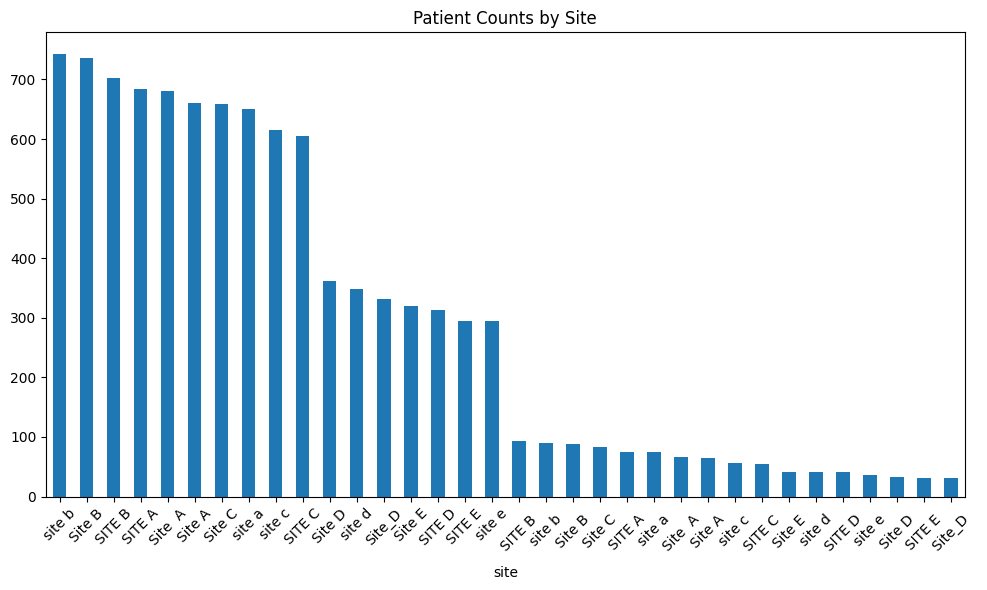

intervention_group
Contrl              802
TREATMENT B         761
Treatment  B        760
Control             751
treatment b         750
control             734
Treatment B         730
CONTROL             715
TreatmentA          635
Treatment A         610
Treatmen A          592
treatment a         588
TREATMENT A         572
  Treatment B       104
  Control            95
  treatment b        90
  CONTROL            84
  TREATMENT B        83
  control            83
  Contrl             73
  treatment a        67
  TreatmentA         66
  Treatment A        66
  TREATMENT A        65
  Treatment  B       64
  Treatmen A         60
Name: count, dtype: int64


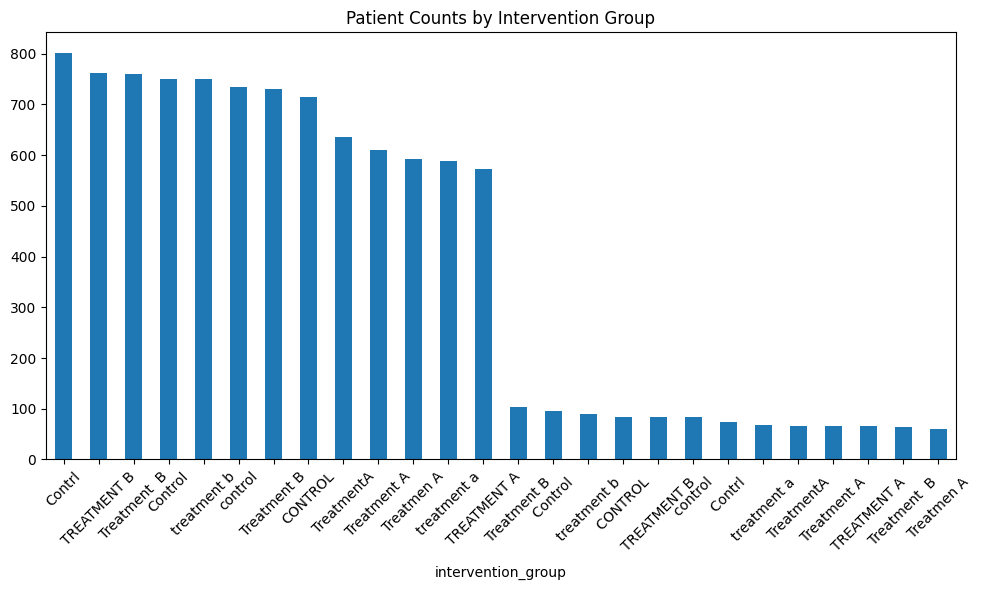

intervention_group    CONTROL      Contrl      Control      TREATMENT A    \
site                                                                        
  SITE A                      0           0            0                0   
  SITE B                      0           0            1                0   
  SITE C                      0           0            0                1   
  SITE D                      0           0            0                0   
  SITE E                      0           0            0                0   
  Site  A                     1           0            1                0   
  Site A                      1           0            0                0   
  Site B                      3           2            0                0   
  Site C                      0           0            1                0   
  Site D                      0           0            0                0   
  Site E                      0           0            1                0   

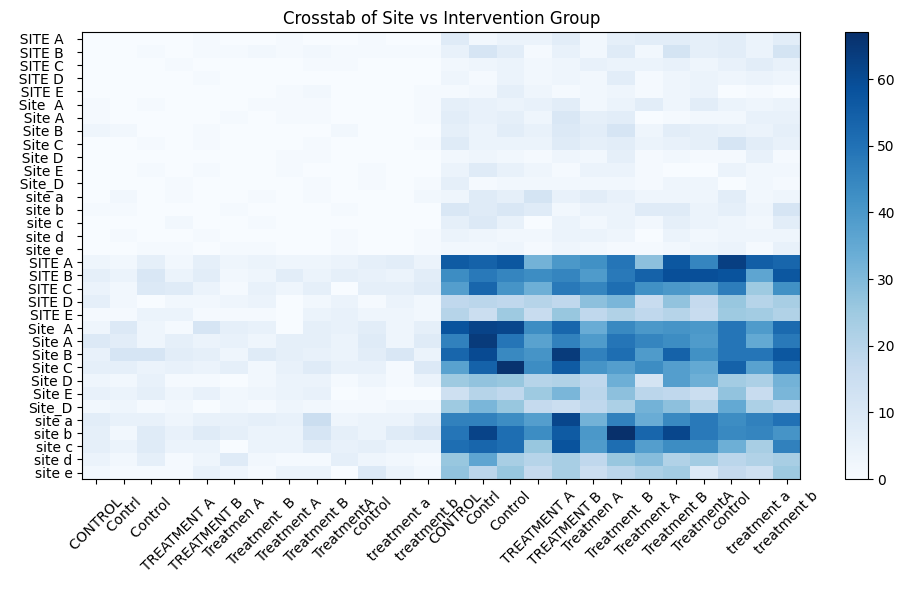

Mean age of patients:                    age
site                  
  SITE A     23.608108
  SITE B     59.670213
  SITE C     60.254545
  SITE D     77.853659
  SITE E     12.258065
  Site  A    80.328358
  Site A     49.843750
  Site B     56.318182
  Site C     27.831325
  Site D    -25.312500
  Site E     75.500000
  Site_D      9.870968
  site a     67.270270
  site b     57.022222
  site c     80.929825
  site d     81.000000
  site e     83.194444
SITE A       60.910819
SITE B       63.628734
SITE C       55.459504
SITE D       55.511182
SITE E       51.867797
Site  A      53.770925
Site A       61.440242
Site B       56.911685
Site C       60.890578
Site D       67.472376
Site E       56.429467
Site_D       77.993976
site a       49.803379
site b       68.405660
site c       56.832520
site d       61.882521
site e       61.860544


In [10]:
# TODO: Value counts and analysis
from q3_data_utils import summarize_by_group


count_site = df['site'].value_counts()
print(count_site)
plot_value_counts(count_site, title='Patient Counts by Site')

count_intervention_group = df['intervention_group'].value_counts()
print(count_intervention_group)
plot_value_counts(count_intervention_group, title='Patient Counts by Intervention Group')

crosstab_site_intervention = pd.crosstab(df['site'], df['intervention_group'])
print(crosstab_site_intervention)
plot_crosstab(crosstab_site_intervention, title='Crosstab of Site vs Intervention Group')

mean_age = summarize_by_group(df, 'site', {'age':'mean'})
print(f"Mean age of patients: {mean_age}")



In [11]:
# TODO: Save output
# site_counts.to_csv('output/q4_site_counts.csv')

mean_age.to_csv('output/q4_site_counts.csv')


## Summary

Write 2-3 sentences about what you learned from exploring this dataset.

**Your summary here:**

From exploring this dataset, I noticed that the values are not consistent, because for example for 'site a', there are different variations like `Site A` or `SITE A`, which represent the same thing, but when we aggregate them may look like different data, which makes analysis more difficult. Other than that, I also noticed having helper functions like the data_utils in Q3 is useful for analysis. 